### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : bitcoin_price.csv
Name        : Yudi Aditya

In [2]:
import pandas as pd
import numpy as np
# Read Bitcoin Cash Price
df = pd.read_csv('../data/raw/cryptocurrencypricehistory/bitcoin_price.csv')
print(df.shape)
df.head()

(1592, 7)


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Sep 05, 2017",4228.29,4427.84,3998.11,4376.53,2697970000,69954400000
1,"Sep 04, 2017",4591.63,4591.63,4108.40,4236.31,2987330000,75955500000
2,"Sep 03, 2017",4585.27,4714.08,4417.59,4582.96,1933190000,75841700000
3,"Sep 02, 2017",4901.42,4975.04,4469.24,4578.77,2722140000,81060600000
4,"Sep 01, 2017",4701.76,4892.01,4678.53,4892.01,2599080000,77748400000


In [4]:
df[df['Volume'] == '-'].head()

,Date,Open,High,Low,Close,Volume,Market Cap
1349,"Dec 26, 2013",683.94,777.75,683.94,761.98,-,8326270000
1350,"Dec 25, 2013",666.31,682.70,649.48,682.21,-,8108930000
1351,"Dec 24, 2013",672.36,684.39,645.71,665.58,-,8179730000
1352,"Dec 23, 2013",613.06,680.91,611.04,673.41,-,7455670000
1353,"Dec 22, 2013",601.78,666.74,585.64,617.18,-,7315940000


Problem  : 
- Missing data in Volume Column 

Solution :
- Interpolation

In [6]:
#Replace missing data as NaN
df.replace('-', np.nan, inplace=True)
df.loc[1349:1355]

,Date,Open,High,Low,Close,Volume,Market Cap
1349,"Dec 26, 2013",683.94,777.75,683.94,761.98,NaN,8326270000
1350,"Dec 25, 2013",666.31,682.70,649.48,682.21,NaN,8108930000
1351,"Dec 24, 2013",672.36,684.39,645.71,665.58,NaN,8179730000
1352,"Dec 23, 2013",613.06,680.91,611.04,673.41,NaN,7455670000
1353,"Dec 22, 2013",601.78,666.74,585.64,617.18,NaN,7315940000
1354,"Dec 21, 2013",619.90,654.27,579.17,605.66,NaN,7533740000
1355,"Dec 20, 2013",694.22,729.16,595.33,625.32,NaN,8433870000


In [7]:
import matplotlib.pyplot as plt

def plot_data(xdata,ydata,xlabel):
    plt.title('Volume vs ' + xlabel)
    plt.scatter(xdata,ydata,marker='.',color='red')
    plt.ylabel('Volume')
    plt.xlabel(xlabel)
    plt.show()

# plot_data(df1.Open, df1['Volume'],'Open')
# plot_data(df1.Close, df1['Volume'],'Close')
# plot_data(df1.High, df1['Volume'],'High')
# plot_data(df1.Low, df1['Volume'],'Low')
# plot_data(df1['Market Cap'], df1['Volume'],'Market Cap')

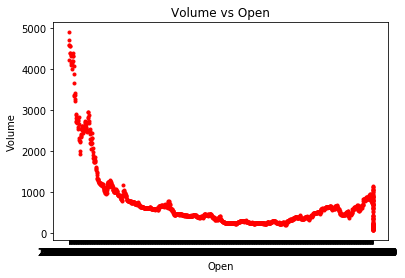

In [40]:
plot_data (df1['Volume'], df1.Open,'Open')